# Ejercicio de Viga Empotrada
1. Determinar la curva fuerza desoplazamiento en el punto B

Se va a resolver utilizando el metodo de los coeficientes de rigides

In [85]:
# Importamos las dependencias
import numpy as np
import math
import matplotlib.pyplot as plt
from IPython.display import display, Latex
import sympy as sp

In [86]:
# Definimos las variables simbolicas del problema
P,L,L1,L2,E,I,u1,u2,Mp,Pr_1,Pr_2,Pr_3 = sp.symbols('P L L1 L2 E I u1 u2 Mp Pr_1 Pr_2 Pr_3')


## Datos

In [87]:
# Definimos los datos generales del problema
L1=L/3
L2=2*L/3

## Rango Elastico

In [88]:
# Definimos el Eqilibrio, relaciones constitutivas y compatibilidad de deformaciones
F=sp.Matrix([[-P],
             [0]])
K=sp.Matrix([[12*E*I*(1/L1**3+1/L2**3),6*E*I*(1/L2**2-1/L1**2)],
             [6*E*I*(1/L2**2-1/L1**2),4*E*I*(1/L1+1/L2)]])

K_inv=K.inv()

EQ=r'$[F]$'
ftext='La matriz de Fuerzas {EQ} es igual a: \n'
display(Latex(ftext))
display(F)

EQ=r'$[K]$'
ftext='La matriz de Rigidez {EQ} es igual a: \n'
display(Latex(ftext))
display(K)

result=K_inv*F

EQ=r'$[K]^{-1}$'
ftext='La matriz de Rigidez invertida {EQ} es igual a: \n'
display(Latex(ftext))
display(K_inv)

EQ=r'$[K]^{-1}[F]$'
ftext='La solucion del sistema de equaciones {EQ} es igual a: \n'
display(Latex(ftext))
display(result)

u1=result[0]
u2=result[1]

u=sp.Matrix([[u1],[u2]])

EQ=r'$\frac{u_1}{u_2}$'
ftext='Los desplazamientos son {EQ} es igual a: \n'
display(Latex(ftext))
display(u1,u2)


<IPython.core.display.Latex object>

Matrix([
[-P],
[ 0]])

<IPython.core.display.Latex object>

Matrix([
[729*E*I/(2*L**3), -81*E*I/(2*L**2)],
[-81*E*I/(2*L**2),         18*E*I/L]])

<IPython.core.display.Latex object>

Matrix([
[8*L**3/(2187*E*I), 2*L**2/(243*E*I)],
[ 2*L**2/(243*E*I),     2*L/(27*E*I)]])

<IPython.core.display.Latex object>

Matrix([
[-8*L**3*P/(2187*E*I)],
[ -2*L**2*P/(243*E*I)]])

<IPython.core.display.Latex object>

-8*L**3*P/(2187*E*I)

-2*L**2*P/(243*E*I)

In [89]:
# Calculamos los momentos en el apoyo izquierdo y derecho
K_FE=sp.Matrix([[-6*E*I/L1**2,2*E*I/L1],
                [6*E*I/L2**2,2*E*I/L2],
                [6*E*I*(1/L2**2),4*E*I*(1/L2)]])

M_FE=K_FE*u

display(M_FE)

Matrix([
[ 4*L*P/27],
[-2*L*P/27],
[-8*L*P/81]])

## Rango Elasto-PLastico -- Primera Rotula

In [90]:
K1=sp.Matrix([[E*I*(3/L1**3+12/L2**3),E*I*(6/L2**2-3/L1**2)],
              [E*I*(6/L2**2-3/L1**2),E*I*(4/L2+3/L1)]])
results1=K1.inv()*F

EQ=r'$[K]$'
ftext='La matriz de Rigidez {EQ} es igual a: \n'
display(Latex(ftext))
display(K1)

u1_1=results1[0]
u2_1=results1[1]

u11=sp.Matrix([[u1_1],[u2_1]])

EQ=r'$\frac{u_1}{u_2}$'
ftext='Los desplazamientos son {EQ} es igual a: \n'
display(Latex(ftext))
display(u1_1,u2_1)

<IPython.core.display.Latex object>

Matrix([
[243*E*I/(2*L**3), -27*E*I/(2*L**2)],
[-27*E*I/(2*L**2),         15*E*I/L]])

<IPython.core.display.Latex object>

-20*L**3*P/(2187*E*I)

-2*L**2*P/(243*E*I)

In [91]:
# Calculamos los momentos en Mc y Mb
K_FE_1=sp.Matrix([[6*E*I/L2**2,2*E*I/L2],
                 [6*E*I/L2**2,4*E*I/L2]])
M_FE_1=K_FE_1*u11
display(M_FE_1)

Matrix([
[ -4*L*P/27],
[-14*L*P/81]])

## Rango Parcialmente PLastico - 2da Rotula

In [92]:
u1_2=-P*L2**3/(3*E*I)
Mc_3=-P*L2

## Determinamos los valores de las cargas de 1ra fluencia, 2da Fluencia, y 3ra Fluencia

In [104]:
Ma_1=M_FE[0]
a=sp.solve(Ma_1-Mp,P)

Mb_2=2*Mp/3+14*Pr_2*L/81
b=sp.solve(Mb_2-Mp,Pr_2)


Mc_3=Mp/2+4*b[0]*L/27+2*Pr_3*L/3
c=sp.solve(Mc_3-Mp,Pr_3)

display(a[0])
display(b[0])
display(c[0])

Load=np.array([a[0]/a[0],1+b[0]/a[0],1+b[0]/a[0]+c[0]/a[0],1+b[0]/a[0]+c[0]/a[0]])

display(a[0]/a[0])
display(b[0]/a[0])
display(c[0]/a[0])

delta_1=u1
delta_2=u1+u1_1.subs(P,b[0]).subs(Mp,4*P*L/27)
delta_3=delta_2+u1_2.subs(P,c[0]).subs(Mp,4*P*L/27)

display(delta_1)
display(delta_2)
display(delta_3)

Displacement=np.array([delta_1/delta_1,delta_2/delta_1,delta_3/delta_1,delta_3/delta_1*1.5])

27*Mp/(4*L)

27*Mp/(14*L)

9*Mp/(28*L)

1

2/7

1/21

-8*L**3*P/(2187*E*I)

-32*L**3*P/(5103*E*I)

-8*L**3*P/(729*E*I)

## Gaficamos

Text(0, 0.5, '$P/P_y$')

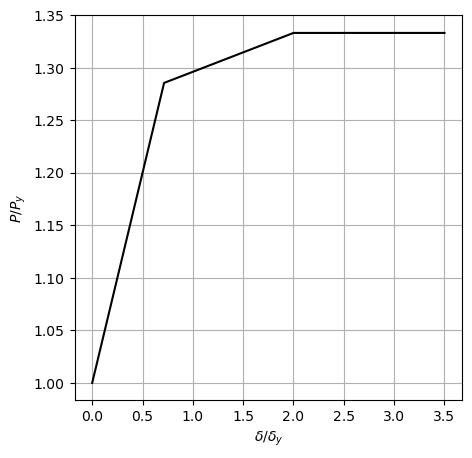

In [109]:
plt.figure(figsize=(5,5), dpi=100)
plt.plot(Displacement-1,Load,color='k',linestyle='-',linewidth=1.5)
plt.grid(True)
plt.xlabel(r'$\delta / \delta_y$')
plt.ylabel(r'$P/P_y$')